<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics of your main cryptocurrency
*   Explore features and charecteristics of your main cryptocurrency based on other cryptocurrencies


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
    <li><a href="https://#granger-causality-test">Granger Causality Test</a></li>
</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the average price of cryptocurrency?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['mplfinance'])
await piplite.install(['xyzservices'])
await piplite.install(['jupyter_bokeh'])
await piplite.install(['bqplot'])

Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install mplfinance=0.12.9b7

In [41]:
import pandas as pd
import numpy as np
import itertools

This function will download the dataset into your browser


In [3]:
#This function will download the dataset into your browser 
import builtins
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


Create path variables with location of files.

In [4]:
# main cryptocurrency path
ada_path='https://1824251045.rsc.cdn77.org/web/algohouse/data/ADABUSD_trades_1m.csv'
# other cryptocurrency paths
ape_path='https://1824251045.rsc.cdn77.org/web/algohouse/data/APEBUSD_trades_1m.csv'
btc_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/BTCBUSD_trades_1m.csv'
eth_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/ETHBUSD_trades_1m.csv'
bnb_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/BNBBUSD_trades_1m.csv'
xrp_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/XRPBUSD_trades_1m.csv'
doge_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/DOGEBUSD_trades_1m.csv'
matic_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data/MATICBUSD_trades_1m.csv'

Download main cryptocurrency;  if you are running locally, please comment out the following

In [7]:
await download(ada_path, 'ada.csv')
ada_filename='ada.csv'

Let's download other cryptocurrencies

In [10]:
downloads = [(ape_path, 'ape'), (btc_path, 'btc'), (eth_path, 'eth'), (bnb_path, 'bnb'), (xrp_path, 'xrp'), (doge_path, 'doge'), (matic_path, 'matic')]
for path, name in downloads:
    await download(path, f'{name}.csv')

Create list of column names for your dataframe.

In [5]:
column_names = ['ts', 'open', 'high', 'low', 'close', 'volume', 'rec_count', 'avg_price']

Read main cryptocurrency.

In [8]:
df = pd.read_csv(ada_filename, index_col='ts', usecols=column_names)
# converting index to datetime
df.index = pd.to_datetime(df.index)
df.head()

,open,high,low,close,volume,rec_count,avg_price
ts,,,,,,,
2022-11-11 14:38:00,0.3450,0.3450,0.3438,0.3438,139808.0,44,0.344496
2022-11-11 14:39:00,0.3437,0.3441,0.3436,0.3440,80960.0,41,0.343841
2022-11-11 14:40:00,0.3439,0.3442,0.3432,0.3433,149624.0,42,0.343694
2022-11-11 14:41:00,0.3432,0.3448,0.3426,0.3446,165967.0,47,0.343953
2022-11-11 14:42:00,0.3446,0.3448,0.3438,0.3438,34815.0,27,0.344382


Read other cryptocurrencies and join them into the same dataframe on 'ts' column using <code>merge</code> method.

In [24]:
avg_prices_df = df[['avg_price']].copy()

for p, name in downloads:
    local_path = f'{name}.csv'
    tmp_df = pd.read_csv(local_path, index_col='ts', usecols=column_names)
    tmp_df.index = pd.to_datetime(tmp_df.index)
    tmp_df = tmp_df[['avg_price']]
    tmp_df = tmp_df.rename(columns={'avg_price': f'{name}_avg_price'})
    avg_prices_df = avg_prices_df.merge(tmp_df, on='ts')
    
avg_prices_df

,avg_price,ape_avg_price,btc_avg_price,eth_avg_price,bnb_avg_price,xrp_avg_price,doge_avg_price,matic_avg_price
ts,,,,,,,,
2022-11-11 14:38:00,0.344496,3.084732,16516.807793,1213.655402,283.244612,0.369150,0.080926,0.993500
2022-11-11 14:39:00,0.343841,3.069644,16473.844114,1210.132181,282.077591,0.367978,0.080565,0.990534
2022-11-11 14:40:00,0.343694,3.071029,16478.644495,1210.617423,281.679925,0.367303,0.080577,0.989423
2022-11-11 14:41:00,0.343953,3.084393,16516.504443,1215.029038,281.223183,0.367660,0.080715,0.991930
2022-11-11 14:42:00,0.344382,3.088095,16527.093981,1216.557003,281.912312,0.368224,0.081038,0.993091
...,...,...,...,...,...,...,...,...
2022-12-29 23:55:00,0.243801,3.611000,16626.700000,1200.306627,246.241255,0.342317,0.070948,0.776618
2022-12-29 23:56:00,0.243821,3.611000,16626.776695,1200.129521,246.298465,0.342379,0.070953,0.776874
2022-12-29 23:57:00,0.243974,3.612000,16626.755211,1200.553127,246.406972,0.342399,0.071025,0.777077


Get number of rows and columns inside dataframe using <code>shape</code>.

In [25]:
df.shape

(65303, 7)

Same for merged dataframe(it may have less row, due to join).

In [26]:
avg_prices_df.shape

(63947, 8)

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


For visualization, we will use 'Matplotlib', 'Seaborn', 'mplfinance', but you may use other tools. 

Let's import our visualization packages. Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.
To install Seaborn, we use pip, the Python package manager.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as fplt
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [48]:
# list the data types for each column
print(df.dtypes)

open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count      int64
avg_price    float64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "open"? </b>

</div>


In [49]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['open'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [50]:
# numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'rec_count', 'avg_price']
corr = df.corr(numeric_only=True)
corr

,open,high,low,close,volume,rec_count,avg_price
open,1.000000,0.999977,0.999973,0.999959,-0.034771,0.151690,0.999981
high,0.999977,1.000000,0.999956,0.999976,-0.032101,0.154701,0.999987
low,0.999973,0.999956,1.000000,0.999980,-0.038556,0.148411,0.999987
close,0.999959,0.999976,0.999980,1.000000,-0.035685,0.151427,0.999989
volume,-0.034771,-0.032101,-0.038556,-0.035685,1.000000,0.556703,-0.035401
rec_count,0.151690,0.154701,0.148411,0.151427,0.556703,1.000000,0.151538
avg_price,0.999981,0.999987,0.999987,0.999989,-0.035401,0.151538,1.000000


Note: our dataframe has only numerical values, so we used <code>numeric_only=True</code> just to show how to omit default behaviour(takes non numerical columns as well) of <code>corr</code> method. 

Now to improve representation of correlation table we can use <code>heatmap</code> from 'Seaborn'.

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<AxesSubplot:>

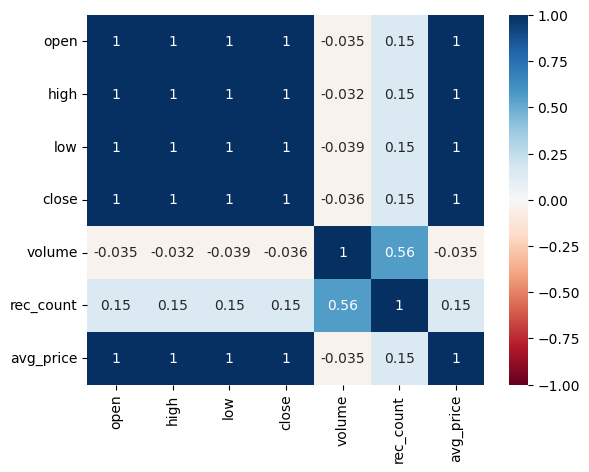

In [51]:
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: open, volume, rec_count, and avg_price.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['open', 'volume', 'rec_count', 'avg_price']]</p>
</div>


In [52]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df[['open', 'volume', 'rec_count', 'avg_price']].corr()
```

</details>


Now let's calculate correlation between different cryptocurrencies.

In [53]:
avg_corr = avg_prices_df.corr()
avg_corr

,avg_price,ape_avg_price,btc_avg_price,eth_avg_price,bnb_avg_price,xrp_avg_price,doge_avg_price,matic_avg_price
avg_price,1.000000,-0.137763,0.058205,0.346060,0.769498,0.656737,0.643579,0.830636
ape_avg_price,-0.137763,1.000000,0.580604,0.525638,0.250646,0.413247,0.550292,0.122063
btc_avg_price,0.058205,0.580604,1.000000,0.880881,0.064559,0.295896,0.364919,0.491169
eth_avg_price,0.346060,0.525638,0.880881,1.000000,0.368134,0.468060,0.617403,0.732224
bnb_avg_price,0.769498,0.250646,0.064559,0.368134,1.000000,0.835815,0.817452,0.618868
xrp_avg_price,0.656737,0.413247,0.295896,0.468060,0.835815,1.000000,0.797957,0.585454
doge_avg_price,0.643579,0.550292,0.364919,0.617403,0.817452,0.797957,1.000000,0.677910
matic_avg_price,0.830636,0.122063,0.491169,0.732224,0.618868,0.585454,0.677910,1.000000


Now let's build heatmap for above correlation.

<AxesSubplot:>

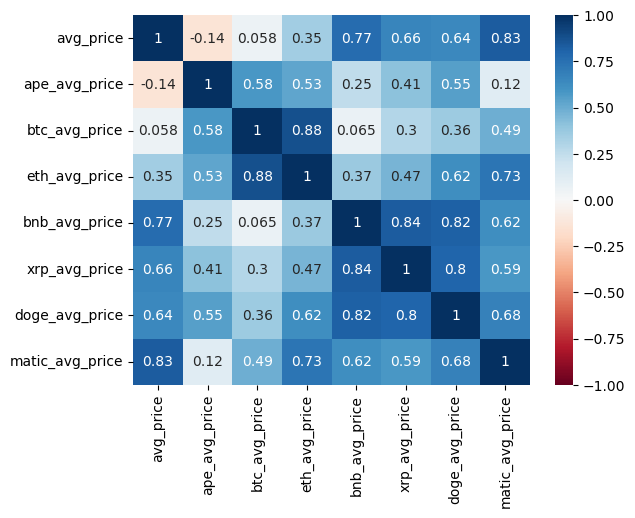

In [54]:
sns.heatmap(avg_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Linear Relationships</h4>


Let's find the scatterplot of 'avg_price' and 'matic_avg_price'.


(0.0, 1.0793331763701328)

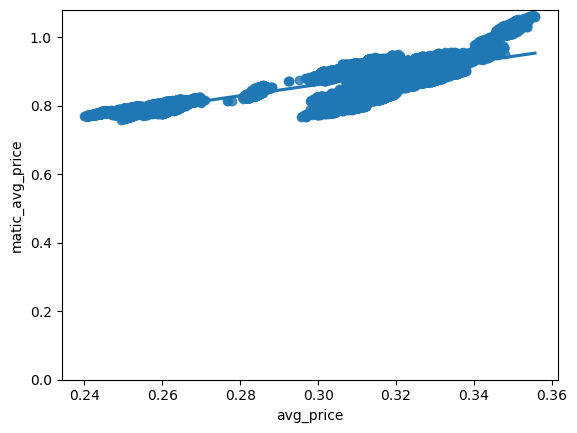

In [55]:
# Engine size as potential predictor variable of price
sns.regplot(x='avg_price', y='matic_avg_price', data=avg_prices_df)
plt.ylim(0,)

<p>As the matic_avg_price goes up, the avg_price goes up as well: this indicates a positive direct correlation between these two variables. matic_avg_price size seems like a pretty good predictor of avg_price since dots fit our line really well.</p>


We can examine the correlation between 'avg_price' and 'matic_avg_price' and see that it's approximately 0.83.


In [56]:
avg_prices_df[['avg_price', 'matic_avg_price']].corr()

,avg_price,matic_avg_price
avg_price,1.000000,0.830636
matic_avg_price,0.830636,1.000000


bnb_avg_price is a potential predictor of avg_price. Let's find the scatterplot of 'avg_price' and 'bnb_avg_price'.


<AxesSubplot:xlabel='avg_price', ylabel='bnb_avg_price'>

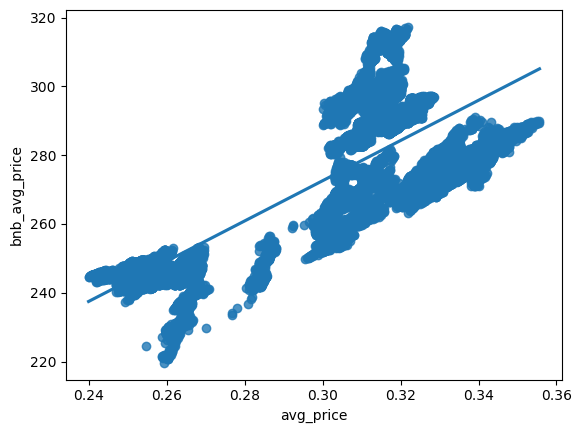

In [57]:
sns.regplot(x='avg_price', y='bnb_avg_price', data=avg_prices_df)

<p>Change this one to positive relationship(text I mean)</p>

<p>As bnb_avg_price goes up, the avg_price goes up: this indicates an positive relationship between these two variables. bnb_avg_price could potentially be a predictor of avg_price.</p> 

<p>It is good to understand that sometimes we may have an inverse/negative relationship between these two variables. Example: bnb_avg_price going up, the avg_price going down. Such relationship could be a potential predictor as well.</p>



We can examine the correlation between 'avg_price' and 'bnb_avg_price'and see it's approximately 0.769498.


In [58]:
avg_prices_df[['avg_price', 'bnb_avg_price']].corr()

,avg_price,bnb_avg_price
avg_price,1.000000,0.769498
bnb_avg_price,0.769498,1.000000


Let's see if "btc_avg_price" is a predictor variable of "avg_price".


<AxesSubplot:xlabel='avg_price', ylabel='btc_avg_price'>

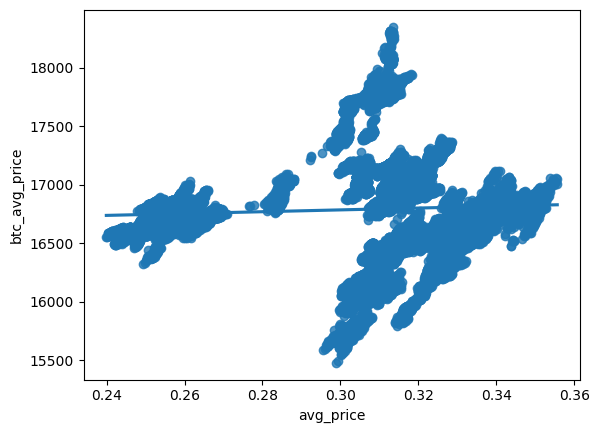

In [59]:
sns.regplot(x='avg_price', y='btc_avg_price', data=avg_prices_df)

<p>btc_avg_price does not seem like a good predictor of the avg_price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'btc_avg_price' and 'avg_price' and see it's approximately 0.058205.


In [60]:
avg_prices_df[['avg_price', 'btc_avg_price']].corr()

,avg_price,btc_avg_price
avg_price,1.000000,0.058205
btc_avg_price,0.058205,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between 'xrp_avg_price' and 'bnb_avg_price'.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['xrp_avg_price', 'bnb_avg_price']].  </p>
</div>


In [61]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.0823, the non-diagonal elements of the table.

avg_prices_df[['xrp_avg_price', 'bnb_avg_price']].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between 'xrp_avg_price' and 'bnb_avg_price', do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


In [27]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x='xrp_avg_price',  y='bnb_avg_price', data=avg_prices_df)

```

</details>


Now let's visualize values of our main cryptocurrency.

<AxesSubplot:xlabel='ts'>

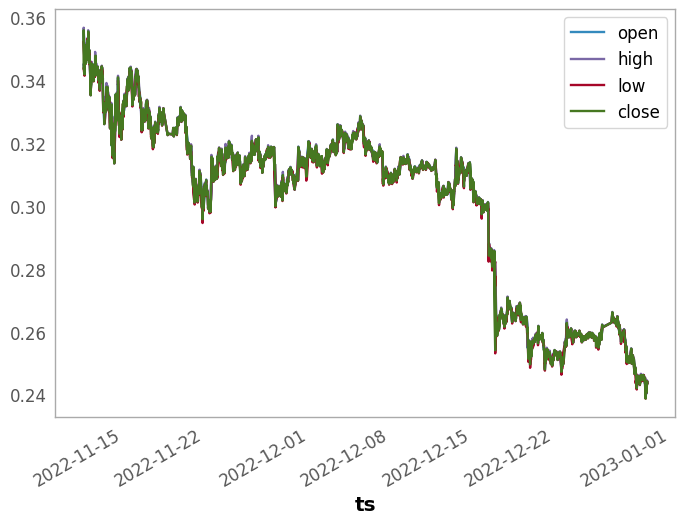

In [90]:
df[['open', 'high', 'low', 'close']].plot()

As you can see it is not convinient to make any assumptions from the above visualization, so let's draw candlesticks using <code>fplt</code>.

We are going to use slice of data from our dataframe. Note: you can customize style of plot, just pick any value for style from <code>['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']</code>

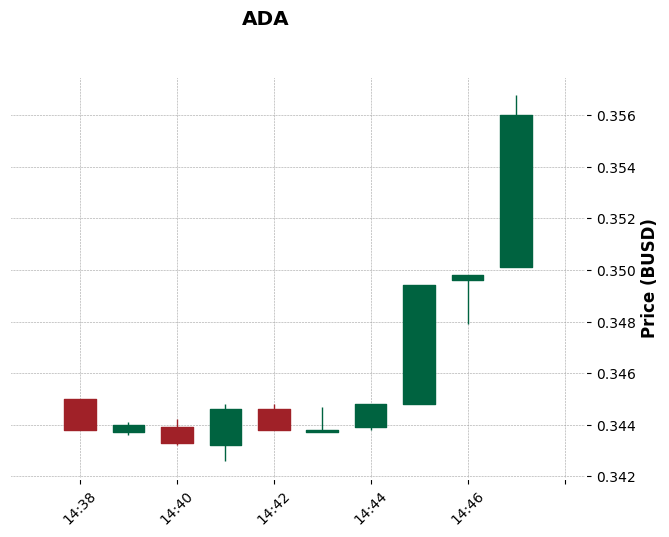

In [91]:
fplt.plot(
            df.iloc[:10, :],
            type='candle',
            style='charles',
            title='ADA',
            ylabel='Price (BUSD)'
        )

Now let's plot candlesticks with volume; expanding our slice from 10 to 20 values.

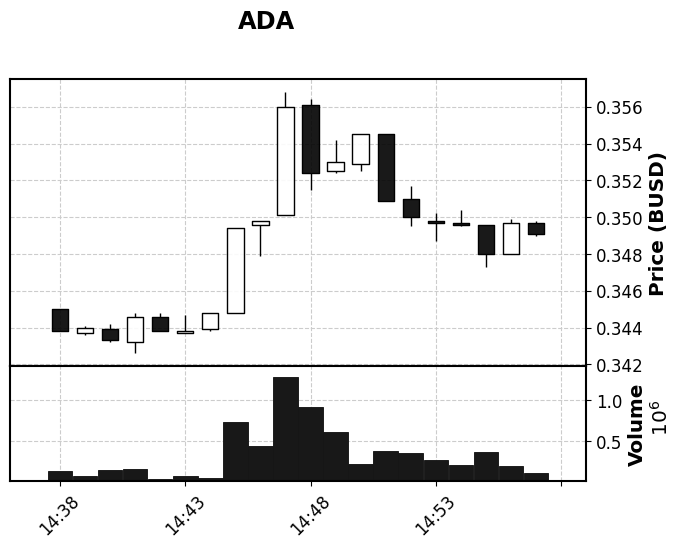

In [92]:
fplt.plot(
            df.iloc[:20, :],
            type='candle',
            style='classic',
            title='ADA',
            ylabel='Price (BUSD)',
            volume=True,
            ylabel_lower='Volume',
        )

Let's use another <code>bqplot</code> and change layout width and increase number of elements in slice.

In [93]:
from bqplot import pyplot as plt
fig = plt.figure(title='ADA CandleStick Chart')

tmp_df = df.iloc[:200]

fig.layout.width='3200px'
fig.layout.hight='1000px'


plt.ohlc(x=tmp_df.index, y=tmp_df[['open','high','low','close']],
         colors=['lime', 'tomato'],
         marker='candle', stroke='blue')

plt.xlabel('Date')
plt.ylabel('Average Price (BUSD)')

plt.show()

Great! Now we know how to display a lot of candlesticks in one plot and we can save the plot as image.

<h3>Categorical Variables</h3>

<p>Let's create bins for all currencies dataframe.</p>


In [94]:
group_names = ['low', 'medium-low', 'medium', 'medium-high', 'high']

Function that converts column of values to column of bins.

In [95]:
from typing import List
def to_categorical(column: pd.Series, labels: List[str]) -> pd.Series:
    bins = np.linspace(min(column), max(column), len(labels) + 1)
    res = pd.cut(column, bins, labels=labels, include_lowest=True)
    return res

Create 'category' column that is created from 'avg_price' of our main cryptocurrency.

In [96]:
avg_prices_df['category'] = to_categorical(avg_prices_df['avg_price'], group_names)

Now let's use <code>unique()</code> command to see categories we have created.

In [97]:
avg_prices_df["category"].unique()

['high', 'medium-high', 'medium', 'medium-low', 'low']
Categories (5, object): ['low' < 'medium-low' < 'medium' < 'medium-high' < 'high']

Now let's do the same with other cryptocurrecies

In [98]:
for p, name in downloads:
    category_column_name = f'{name}_category'
    avg_prices_df[category_column_name] = to_categorical(avg_prices_df[f'{name}_avg_price'], group_names)

In [99]:
avg_prices_df.head()

,avg_price,ape_avg_price,btc_avg_price,eth_avg_price,bnb_avg_price,xrp_avg_price,doge_avg_price,matic_avg_price,category,ape_category,btc_category,eth_category,bnb_category,xrp_category,doge_category,matic_category
ts,,,,,,,,,,,,,,,,
2022-11-11 14:38:00,0.344496,3.084732,16516.807793,1213.655402,283.244612,0.369150,0.080926,0.993500,high,medium-low,medium-low,medium,medium-high,medium,medium-low,medium-high
2022-11-11 14:39:00,0.343841,3.069644,16473.844114,1210.132181,282.077591,0.367978,0.080565,0.990534,high,medium-low,medium-low,medium,medium-high,medium,medium-low,medium-high
2022-11-11 14:40:00,0.343694,3.071029,16478.644495,1210.617423,281.679925,0.367303,0.080577,0.989423,high,medium-low,medium-low,medium,medium-high,medium,medium-low,medium-high
2022-11-11 14:41:00,0.343953,3.084393,16516.504443,1215.029038,281.223183,0.367660,0.080715,0.991930,high,medium-low,medium-low,medium,medium-high,medium,medium-low,medium-high
2022-11-11 14:42:00,0.344382,3.088095,16527.093981,1216.557003,281.912312,0.368224,0.081038,0.993091,high,medium-low,medium-low,medium,medium-high,medium,medium-low,medium-high


Now, we can easily see how many different bins we have for each cryptocurrency.

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [100]:
avg_prices_df.describe()

,avg_price,ape_avg_price,btc_avg_price,eth_avg_price,bnb_avg_price,xrp_avg_price,doge_avg_price,matic_avg_price
count,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000,63947.000000
mean,0.302205,3.596184,16788.302583,1226.161220,273.854682,0.374341,0.087267,0.865409
std,0.027798,0.420561,374.898835,46.316067,21.115321,0.019416,0.010235,0.055044
min,0.239938,2.618512,15479.290126,1075.992278,219.633131,0.321119,0.069423,0.759138
25%,0.283572,3.258325,16566.289031,1197.122161,250.595362,0.354679,0.077727,0.810177
50%,0.312099,3.597608,16799.195444,1218.610201,276.310000,0.379248,0.086382,0.870488
75%,0.318920,3.965548,16965.715440,1264.884185,290.587961,0.389375,0.096529,0.910885
max,0.355647,4.467341,18352.156302,1347.805427,317.315913,0.417387,0.111186,1.064086


The default setting of "describe" skips variables of type category. We can apply the method "describe" on the variables of type 'category' as follows:


In [101]:
avg_prices_df.describe(include=['category'])

,category,ape_category,btc_category,eth_category,bnb_category,xrp_category,doge_category,matic_category
count,63947,63947,63947,63947,63947,63947,63947,63947
unique,5,5,5,5,5,5,5,5
top,medium-high,medium-high,medium,medium,medium-high,medium-high,low,medium
freq,32248,20295,38096,27521,23987,26527,16203,26282


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method 'category' only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['category']</code>, not two brackets <code>df[['category']]</code>.</p>


In [102]:
avg_prices_df['category'].value_counts()

medium-high    32248
low            12149
medium          9872
high            5290
medium-low      4388
Name: category, dtype: int64

We can convert the series to a dataframe as follows:


In [103]:
category_counts = avg_prices_df['category'].value_counts().to_frame()

Let's repeat the above steps but save the results to the dataframe 'category_counts' and rename the column  'category' to 'category_value_counts'.


In [104]:
category_counts.rename(columns={'category': 'category_value_counts'}, inplace=True)
category_counts.index.name = 'categories'
category_counts

,category_value_counts
categories,
medium-high,32248
low,12149
medium,9872
high,5290
medium-low,4388


Now let's add other currencies into category_counts dataframe:


In [105]:
all_category_counts = category_counts.copy()

for p, name in downloads:
    category_column_name = f'{name}_category'
    curr_counts = avg_prices_df[category_column_name].value_counts().to_frame()
    curr_counts.rename(columns={category_column_name: f'{category_column_name}_value_counts'}, inplace=True)
    curr_counts.index.name = 'categories'
    # add new column to all_category_counts
    all_category_counts = all_category_counts.merge(curr_counts, on='categories')
    

In [106]:
all_category_counts

,category_value_counts,ape_category_value_counts,btc_category_value_counts,eth_category_value_counts,bnb_category_value_counts,xrp_category_value_counts,doge_category_value_counts,matic_category_value_counts
categories,,,,,,,,
medium-high,32248,20295,4234,22816,23987,26527,14579,2338
low,12149,8273,1853,2481,1378,1632,16203,18951
medium,9872,17774,38096,27521,14841,12855,13014,26282
high,5290,6473,1466,2791,6685,6029,5064,723
medium-low,4388,11132,18298,8338,17056,16904,15087,15653


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "category". We see that there are 3 different categories of drive wheels.</p>


In [107]:
avg_prices_df['category'].unique()

['high', 'medium-high', 'medium', 'medium-low', 'low']
Categories (5, object): ['low' < 'medium-low' < 'medium' < 'medium-high' < 'high']

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group 'category' and then average them.</p>

<p>We can select the columns 'category', and 'avg_price', then assign it to the variable "df_group_one".</p>


In [108]:
df_group_one = avg_prices_df[['avg_price','category']]

We can then calculate the average price for each of the different categories of data.


In [109]:
# grouping results
df_group_one = df_group_one.groupby(['category'],as_index=False).mean()
df_group_one

,category,avg_price
0,low,0.254992
1,medium-low,0.268275
2,medium,0.304562
3,medium-high,0.317651
4,high,0.340219


<p>You can also group by multiple variables. For example, let's group by both 'category' and 'btc_category'. This groups the dataframe by the unique combination of 'category' and 'btc_category'. We can store the results in the variable 'grouped_test1'.</p>


In [110]:
# grouping results
df_gptest = avg_prices_df[['avg_price', 'category','btc_category']]
grouped_test1 = df_gptest.groupby(['category', 'btc_category'],as_index=False).mean()
grouped_test1

,category,btc_category,avg_price
0,low,low,NaN
1,low,medium-low,0.248802
2,low,medium,0.256689
3,low,medium-high,NaN
4,low,high,NaN
5,medium-low,low,NaN
6,medium-low,medium-low,0.263514
7,medium-low,medium,0.268286
8,medium-low,medium-high,NaN
9,medium-low,high,NaN


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [111]:
grouped_pivot = grouped_test1.pivot(index='category',columns='btc_category')
grouped_pivot

avg_price                                           
btc_category       low medium-low    medium medium-high      high
category                                                         
low                NaN   0.248802  0.256689         NaN       NaN
medium-low         NaN   0.263514  0.268286         NaN       NaN
medium        0.303045   0.306326  0.305038    0.302213  0.307918
medium-high   0.317151   0.318246  0.317539    0.317866  0.312297
high               NaN   0.335591  0.340619         NaN       NaN

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [112]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

avg_price                                           
btc_category       low medium-low    medium medium-high      high
category                                                         
low           0.000000   0.248802  0.256689    0.000000  0.000000
medium-low    0.000000   0.263514  0.268286    0.000000  0.000000
medium        0.303045   0.306326  0.305038    0.302213  0.307918
medium-high   0.317151   0.318246  0.317539    0.317866  0.312297
high          0.000000   0.335591  0.340619    0.000000  0.000000

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average price of each car based on "category".</p>
</div>


In [113]:
# Write your code below and press Shift+Enter to execute 
# grouping results

<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = avg_prices_df[['category','avg_price']]
grouped_test_bodystyle = df_gptest2.groupby(['category'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again.


In [114]:
import matplotlib.pyplot as plt
%matplotlib inline 

Let's use a heat map to visualize the relationship between avg_price vs btc_category.


In [115]:
from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)

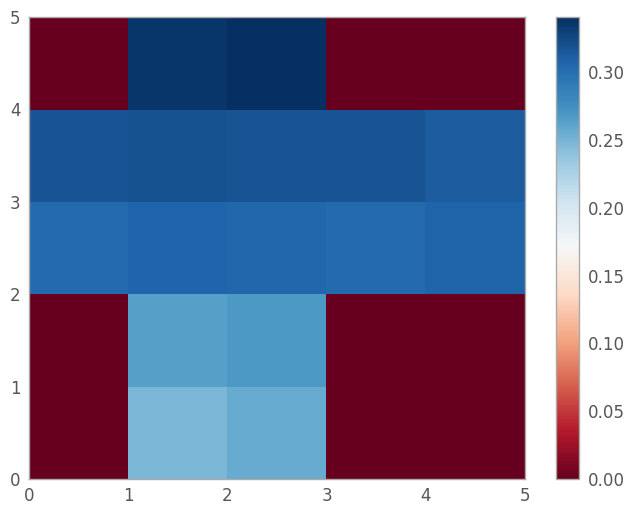

In [116]:
#use the grouped
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'btc_category' and 'avg_price' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'btc_category' and 'avg_price'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


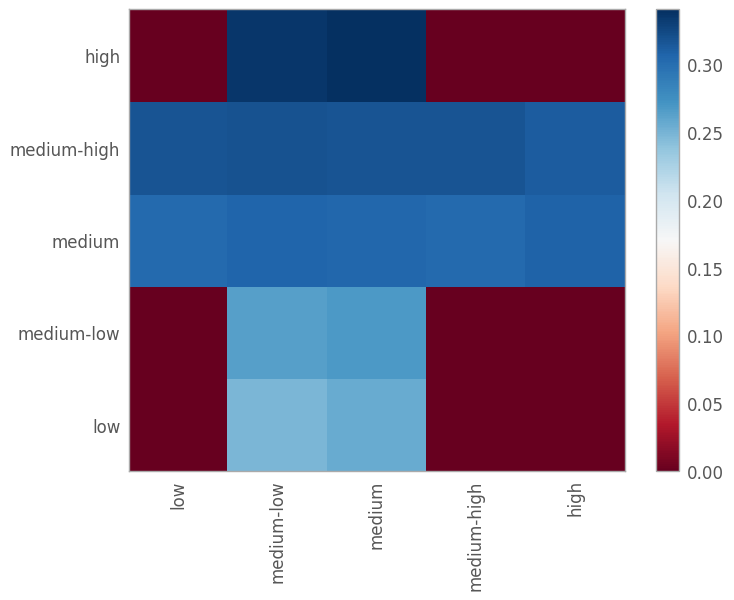

In [117]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics that have the most impact on the average price of cryptocurrency?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of our currency with other cryptocurrencies. In other words: how is the avarege price dependent on other average price variables?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [118]:
avg_prices_df.corr(numeric_only=True)

,avg_price,ape_avg_price,btc_avg_price,eth_avg_price,bnb_avg_price,xrp_avg_price,doge_avg_price,matic_avg_price
avg_price,1.000000,-0.137763,0.058205,0.346060,0.769498,0.656737,0.643579,0.830636
ape_avg_price,-0.137763,1.000000,0.580604,0.525638,0.250646,0.413247,0.550292,0.122063
btc_avg_price,0.058205,0.580604,1.000000,0.880881,0.064559,0.295896,0.364919,0.491169
eth_avg_price,0.346060,0.525638,0.880881,1.000000,0.368134,0.468060,0.617403,0.732224
bnb_avg_price,0.769498,0.250646,0.064559,0.368134,1.000000,0.835815,0.817452,0.618868
xrp_avg_price,0.656737,0.413247,0.295896,0.468060,0.835815,1.000000,0.797957,0.585454
doge_avg_price,0.643579,0.550292,0.364919,0.617403,0.817452,0.797957,1.000000,0.677910
matic_avg_price,0.830636,0.122063,0.491169,0.732224,0.618868,0.585454,0.677910,1.000000


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [119]:
from scipy import stats

<h3>APE average price vs BTC average price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'ape_avg_price' and 'btc_avg_price'.


In [120]:
pearson_coef, p_value = stats.pearsonr(avg_prices_df['ape_avg_price'], avg_prices_df['btc_avg_price'])
print(f'The Pearson Correlation Coefficient is {pearson_coef:.5f} with a P-value of P = {p_value}')  

The Pearson Correlation Coefficient is 0.58060 with a P-value of P = 0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.580).</p>


Similarly to the above let's calculate Pearson Correlation Coefficient and P-value between our main cryptocurrency and other cryptocurrencies

In [121]:
for p, name in downloads:
    pearson_coef, p_value = stats.pearsonr(avg_prices_df['avg_price'], avg_prices_df[f'{name}_avg_price'])
    print(f'The Pearson Correlation Coefficient between our main cryptocurrency and {name} is {pearson_coef:.5f} with a P-value of P = {p_value:.5f}') 

The Pearson Correlation Coefficient between our main cryptocurrency and ape is -0.13776 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and btc is 0.05820 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and eth is 0.34606 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and bnb is 0.76950 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and xrp is 0.65674 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and doge is 0.64358 with a P-value of P = 0.00000
The Pearson Correlation Coefficient between our main cryptocurrency and matic is 0.83064 with a P-value of P = 0.00000


From the rules and conclusions represented above, you can easily draw your own conclusions for all values we calculated. 

<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Category</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

In [122]:
grouped_test2=df_gptest[['avg_price', 'category']].groupby(['category'])
grouped_test2.head(2)

,avg_price,category
ts,,
2022-11-11 14:38:00,0.344496,high
2022-11-11 14:39:00,0.343841,high
2022-11-13 07:01:00,0.330637,medium-high
2022-11-13 07:02:00,0.331031,medium-high
2022-11-21 00:05:00,0.308066,medium
2022-11-21 00:06:00,0.307237,medium
2022-12-16 09:03:00,0.286162,medium-low
2022-12-16 09:05:00,0.285991,medium-low
2022-12-16 22:38:00,0.260960,low


We can obtain the values of the method group using the method "get_group".


In [124]:
grouped_test2.get_group('high')['avg_price']

ts
2022-11-11 14:38:00    0.344496
2022-11-11 14:39:00    0.343841
2022-11-11 14:40:00    0.343694
2022-11-11 14:41:00    0.343953
2022-11-11 14:42:00    0.344382
                         ...   
2022-11-17 01:43:00    0.332686
2022-11-17 01:44:00    0.332600
2022-11-17 01:45:00    0.332649
2022-11-17 01:46:00    0.332600
2022-11-17 01:47:00    0.332585
Name: avg_price, Length: 5290, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [125]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('low')['avg_price'], grouped_test2.get_group('medium-low')['avg_price'], grouped_test2.get_group('medium')['avg_price'], grouped_test2.get_group('medium-high')['avg_price'], grouped_test2.get_group('high')['avg_price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 403033.4252635953 , P = 0.0


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all five tested groups are all this highly correlated?

Let's examine them separately.


#### medium-low and medium


In [126]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('medium-low')['avg_price'], grouped_test2.get_group('medium')['avg_price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 167246.35222105432 , P = 0.0


Let's examine the other groups.


#### medium and medium-high


In [127]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('medium')['avg_price'], grouped_test2.get_group('medium-high')['avg_price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 45129.82197561543 , P = 0.0


Let's create a for loop and calculate ANOVA for every pair

In [131]:
# make sure you created group_names in previous steps
names = group_names.copy()
cols = [f"{name}_x" for name in names]
idxs = [f"{name}_y" for name in names]

anova_f_df = pd.DataFrame(columns=cols, index=idxs)
anova_p_df = pd.DataFrame(columns=cols, index=idxs)

for (curr1, curr2) in itertools.permutations(names, 2):
    f_val, p_val = stats.f_oneway(grouped_test2.get_group(curr1)['avg_price'], grouped_test2.get_group(curr2)['avg_price'])  
    anova_f_df.loc[f"{curr2}_y", f"{curr1}_x"] = f_val
    anova_p_df.loc[f"{curr2}_y", f"{curr1}_x"] = p_val

Now let's display f and p value dataframes

In [132]:
anova_f_df

,low_x,medium-low_x,medium_x,medium-high_x,high_x
low_y,NaN,17518.648989,697821.462729,1095216.247177,1040267.140908
medium-low_y,17518.648989,NaN,167246.352221,260717.526736,326936.370536
medium_y,697821.462729,167246.352221,NaN,45129.821976,262621.52272
medium-high_y,1095216.247177,260717.526736,45129.821976,NaN,70352.691179
high_y,1040267.140908,326936.370536,262621.52272,70352.691179,NaN


In [133]:
anova_p_df

,low_x,medium-low_x,medium_x,medium-high_x,high_x
low_y,NaN,0.0,0.0,0.0,0.0
medium-low_y,0.0,NaN,0.0,0.0,0.0
medium_y,0.0,0.0,NaN,0.0,0.0
medium-high_y,0.0,0.0,0.0,NaN,0.0
high_y,0.0,0.0,0.0,0.0,NaN


Result dataframes have NaN values; diagonal elements always going to be NaN(we are not supposed to calculate them). So let's replace them with space character.

In [135]:
np.fill_diagonal(anova_f_df.values, ' ')
np.fill_diagonal(anova_p_df.values, ' ')

And display one of f value and p value dataframes one more time.

In [136]:
anova_f_df  

,low_x,medium-low_x,medium_x,medium-high_x,high_x
low_y,,17518.648989,697821.462729,1095216.247177,1040267.140908
medium-low_y,17518.648989,,167246.352221,260717.526736,326936.370536
medium_y,697821.462729,167246.352221,,45129.821976,262621.52272
medium-high_y,1095216.247177,260717.526736,45129.821976,,70352.691179
high_y,1040267.140908,326936.370536,262621.52272,70352.691179,


In [137]:
anova_p_df  

,low_x,medium-low_x,medium_x,medium-high_x,high_x
low_y,,0.0,0.0,0.0,0.0
medium-low_y,0.0,,0.0,0.0,0.0
medium_y,0.0,0.0,,0.0,0.0
medium-high_y,0.0,0.0,0.0,,0.0
high_y,0.0,0.0,0.0,0.0,


<h2 id="durbin-watson test">7. Durbin-Watson Test</h2>

What is Durbin-Watson Test?
In regression analysis, Durbin-Watson (DW) is useful for checking the first-order autocorrelation (serial correlation). It analyzes the residuals for independence over time points (autocorrelation). The autocorrelation varies from -1 (negative autocorrelation) to 1 (positive autocorrelation).

Durbin-Watson test analyzes the following hypotheses,

Null hypothesis (H0): Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0) Alternative hypothesis (Ha): Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)

We will use durbin_watson for Durbin-Watson Test and OLS to get residuals from "statsmodels" library

In [140]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

Let's implement a function that creates regression models

In [141]:
def get_reg(x: pd.Series, y: pd.Series):
    # to get intercept
    X = sm.add_constant(x)
    # fit the regression model
    reg = sm.OLS(y, X).fit()
    return reg

In [142]:
X = avg_prices_df["avg_price"] # independent
y = avg_prices_df["btc_avg_price"] # dependent
reg = get_reg(X, y)

In [143]:
durbin_watson(resids=np.array(reg.resid))

0.000513938639829361

Now that we now how to calculate Durbin-Watson we can evaluate Durbin-Watson between main and other currencies.

In [144]:
# define names that corresponds to names of all cryptocurrecies differnt from main.
names = [name for p, name in downloads]

In [145]:
for name in names:
    X = avg_prices_df[f"avg_price"] # independent
    y = avg_prices_df[f"{name}_avg_price"] # dependent
    reg = get_reg(X, y)
    dw = durbin_watson(resids=np.array(reg.resid))
    print(f'Durbin-Watson between main currency and {name}: {dw:.5f}')

Durbin-Watson between main currency and ape: 0.00015
Durbin-Watson between main currency and btc: 0.00051
Durbin-Watson between main currency and eth: 0.00036
Durbin-Watson between main currency and bnb: 0.00018
Durbin-Watson between main currency and xrp: 0.00040
Durbin-Watson between main currency and doge: 0.00014
Durbin-Watson between main currency and matic: 0.00051


Let's calculate Durbin-Watson for all other cryptocurrencies

In [146]:
cols = [f"{name}_dep" for name in names]
idxs = [f"{name}_ind" for name in names]

dw_df = pd.DataFrame(columns=cols, index=idxs)

for (curr1, curr2) in itertools.permutations(names, 2):
    X = avg_prices_df[f"{curr1}_avg_price"] # independent
    y = avg_prices_df[f"{curr2}_avg_price"] # dependent
    # to get intercept
    X = sm.add_constant(X)
    # fit the regression model
    reg = sm.OLS(y, X).fit()
    dw = durbin_watson(resids=np.array(reg.resid))
    dw_df.loc[f"{curr2}_ind", f"{curr1}_dep"] = dw
dw_df

,ape_dep,btc_dep,eth_dep,bnb_dep,xrp_dep,doge_dep,matic_dep
ape_ind,NaN,0.00026,0.000179,0.000126,0.000151,0.000162,0.000122
btc_ind,0.00065,NaN,0.000727,0.000512,0.00046,0.000499,0.000433
eth_ind,0.000433,0.000591,NaN,0.000363,0.00035,0.000433,0.000409
bnb_ind,0.000098,0.000093,0.000081,NaN,0.000602,0.000279,0.000143
xrp_ind,0.000323,0.000242,0.000268,0.000802,NaN,0.000649,0.000321
doge_ind,0.000152,0.000099,0.000169,0.000298,0.000468,NaN,0.000188
matic_ind,0.000249,0.000171,0.000283,0.000299,0.000277,0.000325,NaN


Replace NaN values with empty values.

In [149]:
np.fill_diagonal(dw_df.values, ' ')
dw_df

,ape_dep,btc_dep,eth_dep,bnb_dep,xrp_dep,doge_dep,matic_dep
ape_ind,,0.00026,0.000179,0.000126,0.000151,0.000162,0.000122
btc_ind,0.00065,,0.000727,0.000512,0.00046,0.000499,0.000433
eth_ind,0.000433,0.000591,,0.000363,0.00035,0.000433,0.000409
bnb_ind,0.000098,0.000093,0.000081,,0.000602,0.000279,0.000143
xrp_ind,0.000323,0.000242,0.000268,0.000802,,0.000649,0.000321
doge_ind,0.000152,0.000099,0.000169,0.000298,0.000468,,0.000188
matic_ind,0.000249,0.000171,0.000283,0.000299,0.000277,0.000325,


<h2 id="granger-casuality-tests">8. Granger Causality Test</h2>

<b>Granger causality test</b> is a statistical test that helps us to determine if an observed time series y and a given lag of it is co-varying. If the null hypothesis holds true then we are not supposed to find any Granger causality. We reject the null hypothesis if in our sample p-values are smaller than a desired significance level.

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Run cell above to reassing plt to 'Matplotlib' pyplot(we used other library previously it may break visualizations now).

In [151]:
left_ax, right_ax = 'avg_price', 'xrp_avg_price'
df_to_test = avg_prices_df[[left_ax, right_ax]]
# assign variables for plot
t = avg_prices_df.index # ts
data1 = df_to_test[left_ax]
data2 = df_to_test[right_ax]

Now let's draw plot based on variables we created in previous cell. 

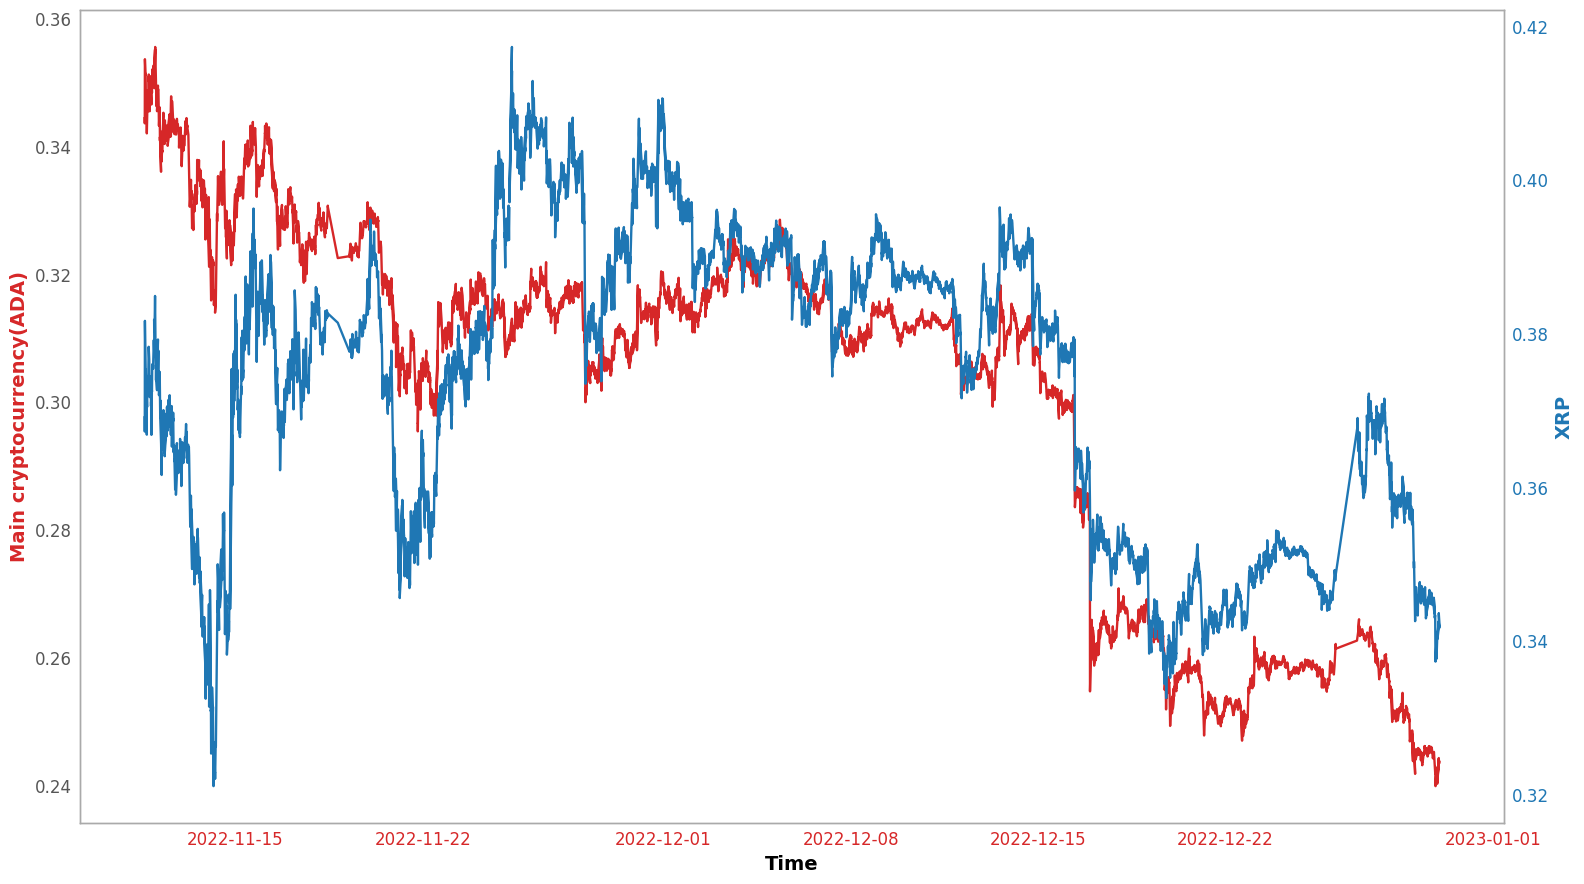

In [152]:
from statsmodels.tsa.stattools import grangercausalitytests

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (16,9))

color = 'tab:red'
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Main cryptocurrency(ADA)', color=color, fontsize=14)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('XRP', color=color, fontsize=14)
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [153]:
from statsmodels.tsa.stattools import grangercausalitytests

In [154]:
def grangers_causation_matrix(data, maxlag, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [155]:
grangers_causation_matrix(df_to_test, 1, variables=df_to_test.columns)

,avg_price_x,xrp_avg_price_x
avg_price_y,1.0000,0.5815
xrp_avg_price_y,0.2463,1.0000


How to interpret the p-values?

Assuming a significance level of 0.05, if the p-value is lesser than 0.05, then we do NOT reject the null hypothesis that X does NOT granger cause Y.

So, in the above table, the p-value for xrp_avg_price_x and avg_price_y is 0.2463. So we accept the null hypothesis and conclude that (xrp_avg_price) does not granger causes (avg_price of our main currency(ADA)).

That means, xrp_avg_price will not be helpful in predicting the avg_price.

The p-value for avg_price_x and xrp_avg_price_y is 0.5815.

Since the p-value isn’t less than 0.05, we can’t reject the null hypothesis. That is, "xrp_avg_price_x" isn’t predictive of "avg_price_y".

Let's calculate Granger Causality Test for all available pairs

In [157]:
names = [name for p, name in downloads]

cols = [f"{name}_x" for name in names]
idxs = [f"{name}_y" for name in names]

gc_df = pd.DataFrame(columns=cols, index=idxs)

for (curr1, curr2) in itertools.permutations(names, 2):
    df_to_test_2 = avg_prices_df[[f"{curr1}_avg_price", f"{curr2}_avg_price"]]
    res_df = grangers_causation_matrix(df_to_test_2, 1, variables=df_to_test_2.columns)
    p1 = res_df[f"{curr1}_avg_price_x"][f"{curr2}_avg_price_y"]
    p2 = res_df[f"{curr2}_avg_price_x"][f"{curr1}_avg_price_y"]
    gc_df.loc[f"{curr1}_y", f"{curr2}_x"] = p1
    gc_df.loc[f"{curr2}_y", f"{curr1}_x"] = p2

# replace diagonal values with space char
np.fill_diagonal(gc_df.values, ' ')
    
gc_df

,ape_x,btc_x,eth_x,bnb_x,xrp_x,doge_x,matic_x
ape_y,,0.0594,0.275,0.0447,0.6678,0.3891,0.669
btc_y,0.0453,,0.0301,0.0023,0.008,0.0005,0.0332
eth_y,0.2582,0.0128,,0.0083,0.1674,0.0245,0.7044
bnb_y,0.1402,0.8655,0.2922,,0.0309,0.006,0.1362
xrp_y,0.4646,0.3878,0.4397,0.5114,,0.0941,0.2083
doge_y,0.4152,0.1985,0.1051,0.3384,0.3273,,0.0269
matic_y,0.348,0.2262,0.2524,0.2793,0.9069,0.6597,


<h3>Conclusion</h3>

Now we have a better idea of our data and understand what cryptocurrency affects our main cryptocurrency(ADABUSD) more.

- MATICBUSD
- BNBBUSD

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
